In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer

In [2]:
np.random.seed(42)

In [3]:
data = {
    'Student_ID': range(1, 21),
    'Math_Score': [75, 88, 92, np.nan, 60, 45, 80, 100, 85, 90, 78, 50, 35, 20, 65, 95, 88, np.nan, 77, 200],
    'Science_Score': [70, 85, 89, 75, 60, 50, 79, 99, 83, 91, 74, 52, 40, 30, 62, 94, 86, 89, 76, 88],
    'Attendance_Percentage': [90, 95, 88, 92, 60, 55, 87, 100, 98, 93, np.nan, 58, 65, 45, 77, 96, 94, 89, 80, 70],
    'Assignment_Grade': ['A', 'A', 'B', 'B', 'C', 'D', 'B', 'A', 'B', 'A', 'B', 'C', 'F', 'F', 'C', 'A', 'B', 'B', 'B', 'Z']  # Z is an invalid grade
}

In [4]:
dataframe=pd.DataFrame(data)

In [5]:
dataframe.head()

,Student_ID,Math_Score,Science_Score,Attendance_Percentage,Assignment_Grade
0,1,75.0,70,90.0,A
1,2,88.0,85,95.0,A
2,3,92.0,89,88.0,B
3,4,NaN,75,92.0,B
4,5,60.0,60,60.0,C


In [6]:
dataframe.columns

Index(['Student_ID', 'Math_Score', 'Science_Score', 'Attendance_Percentage',
       'Assignment_Grade'],
      dtype='object')

In [7]:
dataframe.isnull().sum()

Student_ID               0
Math_Score               2
Science_Score            0
Attendance_Percentage    1
Assignment_Grade         0
dtype: int64

In [8]:
#filling missing values
dataframe['Math_Score'].fillna(dataframe['Math_Score'].mean(),inplace=True)
dataframe['Attendance_Percentage'].fillna(dataframe['Attendance_Percentage'].mean(),inplace=True)

In [9]:
dataframe.isnull().sum()

Student_ID               0
Math_Score               0
Science_Score            0
Attendance_Percentage    0
Assignment_Grade         0
dtype: int64

In [10]:
#fixing inconsistent values
valid_grades=['A','B','C','D','F']
dataframe['Assignment_Grade']=dataframe['Assignment_Grade'].apply(lambda x : x if x in valid_grades else dataframe['Assignment_Grade'].mode()[0])

In [11]:
dataframe['Assignment_Grade'].unique()

array(['A', 'B', 'C', 'D', 'F'], dtype=object)

In [12]:
#detect outliers using zscore
numeric_cols = ['Math_Score', 'Science_Score', 'Attendance_Percentage']
z_score=np.abs(zscore(dataframe[numeric_cols]))
outliers=(z_score>3)

In [13]:
print(outliers)

    Math_Score  Science_Score  Attendance_Percentage
0        False          False                  False
1        False          False                  False
2        False          False                  False
3        False          False                  False
4        False          False                  False
5        False          False                  False
6        False          False                  False
7        False          False                  False
8        False          False                  False
9        False          False                  False
10       False          False                  False
11       False          False                  False
12       False          False                  False
13       False          False                  False
14       False          False                  False
15       False          False                  False
16       False          False                  False
17       False          False                 

In [14]:
for col in numeric_cols:
    Q1 = dataframe[col].quantile(0.25)
    Q3 = dataframe[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataframe[col] = np.where(dataframe[col] > upper_bound, upper_bound,
              np.where(dataframe[col] < lower_bound, lower_bound, dataframe[col]))

In [15]:
#skewness
print(dataframe['Math_Score'].skew())

-0.35518553612254267


In [16]:
transformer=PowerTransformer(method='yeo-johnson')
dataframe['Math_Score_transformed']=transformer.fit_transform(dataframe[['Math_Score']]) #syntax imp

In [17]:
print(dataframe['Math_Score_transformed'].skew())

-0.04525620885574577


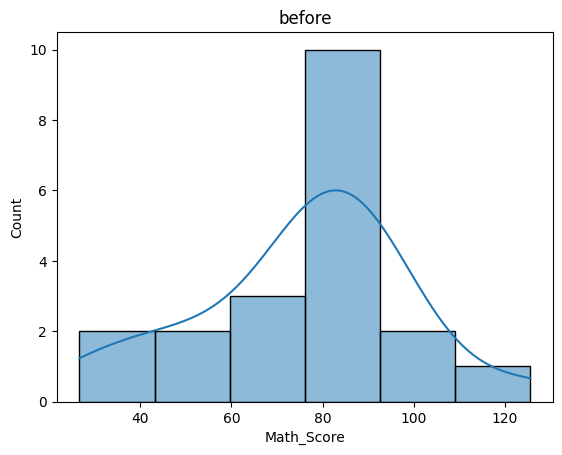

In [18]:
plt.title('before')
sns.histplot(x='Math_Score',kde=True,data=dataframe)
plt.show()

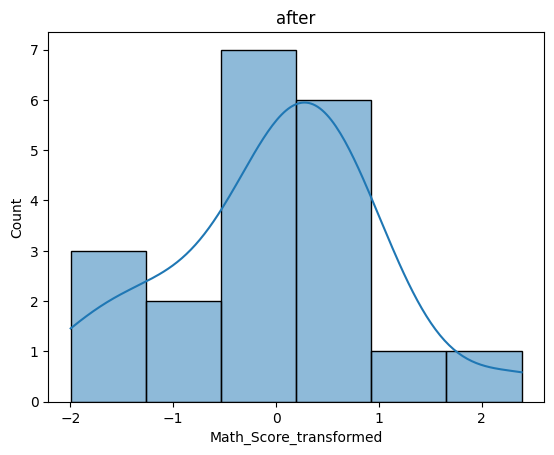

In [19]:
plt.title('after')
sns.histplot(x='Math_Score_transformed',kde=True,data=dataframe)
plt.show()

In [24]:
dataframe['Assignment_Grade']=dataframe[dataframe['Assignment_Grade']=='A']

,Student_ID,Math_Score,Science_Score,Attendance_Percentage,Assignment_Grade,Math_Score_transformed
0,1,75.0,70.0,90.0,A,-0.077823
1,2,88.0,85.0,95.0,A,0.518840
7,8,100.0,99.0,100.0,A,1.093286
9,10,90.0,91.0,93.0,A,0.613064
15,16,95.0,94.0,96.0,A,0.851312
